Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

### **Importamos librerías**

In [3]:
### Manipulación de Datos
import pandas as pd
import numpy as np

### Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

### Tratamiento de datos
from utils.funciones import extended_describe, BaseLine, cardinalidad

### Machine Learning
# Preparación de datos 
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import  classification_report, confusion_matrix,  accuracy_score , roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix, make_scorer

from sklearn.model_selection import GridSearchCV
# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

### **Importamos los datos**

In [22]:
pd.options.display.max_columns = None
df = pd.read_csv('./data/train.csv')
df.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,0.00,0.009,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,0.82,0.820,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,0.00,0.000,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,0.23,0.004,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,0.670,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


### 1) Analisis exploratorio de datos

#### Primera exploración

In [5]:
df.shape

(5597, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [7]:
df.describe()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,0.324309,0.329693,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,0.328954,0.377353,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,0.000000,0.002000,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,0.230000,0.008000,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,0.610000,0.700000,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


- Target binaria -> Modelos supervisados de clasificación -> Métricas : accuracy, precision, recall, f1_score, etc.
- Las columnas se encuentran en distintas escalas.

In [8]:
df.isna().sum()

ID        0
col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
col11     0
col12     0
col13     0
col14     0
col15     0
col16     0
col17     0
col18     0
col19     0
col20     0
target    0
dtype: int64

In [9]:
df.duplicated().sum()

0

- No poseemos nulos ni duplicados

In [11]:
cardinalidad(df)

,cardinalidad,porcentaje_cardinalidad,tipo_de_dato,valores_unicos,tipo_de_variable
ID,5597,100.000000,int64,valores unicos no representativos,Numerica
col1,479,8.558156,float64,valores unicos no representativos,Numerica
col2,2320,41.450777,float64,valores unicos no representativos,Numerica
col3,107,1.911738,float64,valores unicos no representativos,Numerica
col4,470,8.397356,float64,valores unicos no representativos,Numerica
col5,23,0.410934,float64,valores unicos no representativos,Numerica
col6,784,14.007504,float64,valores unicos no representativos,Numerica
col7,91,1.625871,float64,valores unicos no representativos,Numerica
col8,201,3.591210,float64,valores unicos no representativos,Numerica
col9,151,2.697874,float64,valores unicos no representativos,Numerica


In [9]:
df.target.unique()

array([0, 1], dtype=int64)

#### Visualización y tratamiento de valores anómalos

In [ ]:
df.columns

Index(['ID', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8',
       'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16',
       'col17', 'col18', 'col19', 'col20', 'target'],
      dtype='object')

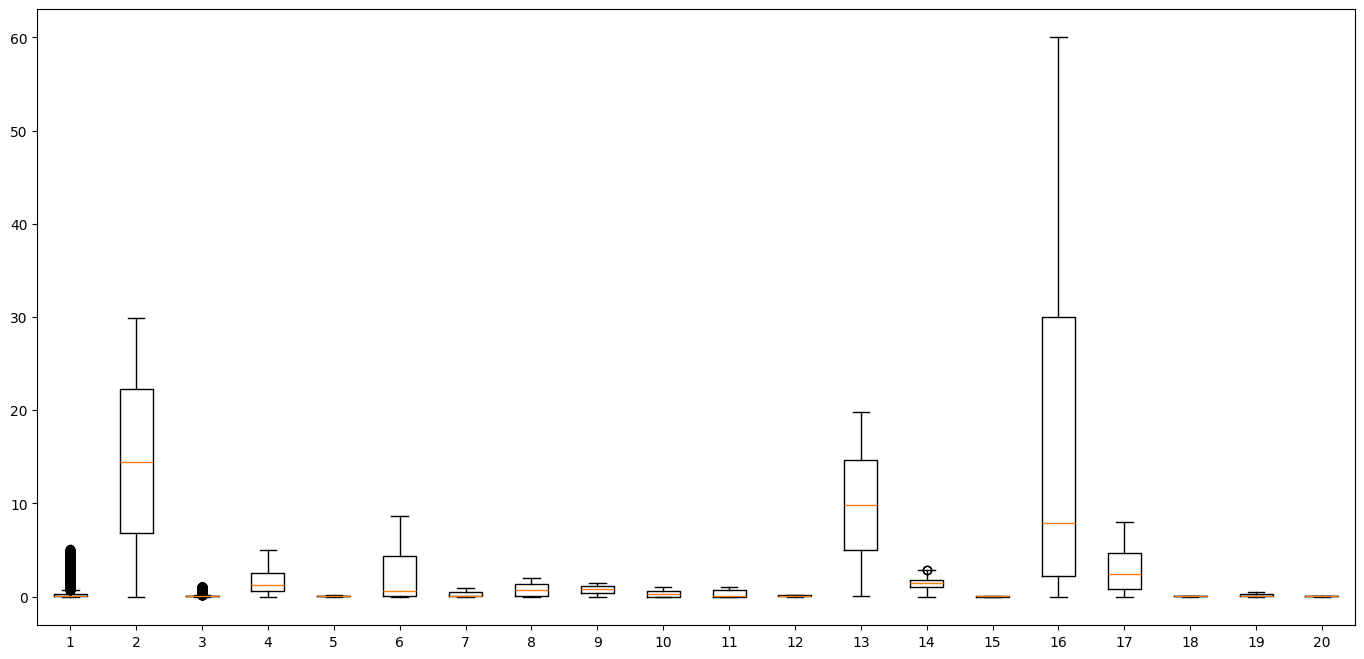

In [ ]:
plt.figure(figsize=(17,8))
plt.boxplot(df.loc[:, 'col1':'col20']);

- El boxplot es ideal para mostrar valores atípicos porque de un vistazo puedes ver dónde están esos 'valores raros'. 
Es como un resumen visual que te ayuda a identificar fácilmente los puntos que se salen de lo común en tus datos

La distribución es leptocúrtica con una curtosis de 2.66. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 2.0.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
col1,5597.0,0.674797,0.07,0.09,1.27,0.0,0.04,0.07,0.29,5.05,2.66,2.0


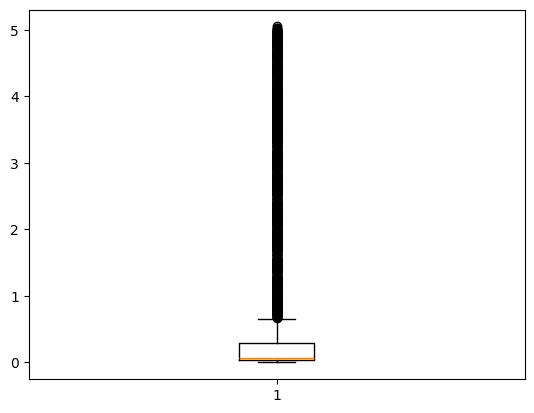

In [23]:
plt.boxplot(df['col1'])
extended_describe('col1', df)

In [24]:
MEDIANA_COL1 = df['col1'].median()
df.loc[df['col1'] >= 1, 'col1'] = MEDIANA_COL1

In [28]:
df.query('col1 >= 1')

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target


La distribución es leptocúrtica con una curtosis de 6.84. Los datos se encuentran concentrados alrededor de la media.
La distribución se encuentra sesgada hacia la izquierda 2.79.


,count,mean,median,mode,std,min,25%,50%,75%,max,kurtosis,skewness
col3,5597.0,0.123767,0.07,0.07,0.21,0.0,0.03,0.07,0.08,1.03,6.84,2.79


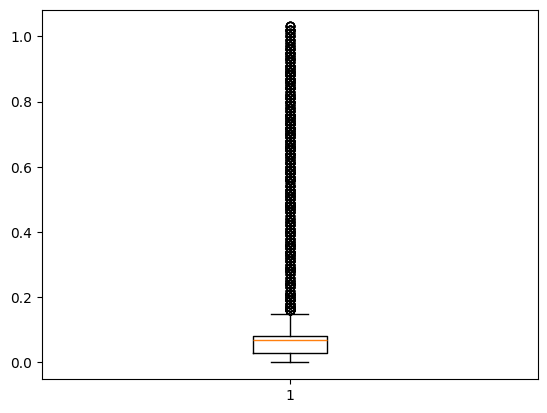

In [ ]:
plt.boxplot(df['col3'])
extended_describe('col3', df)

In [26]:
MEDIANA_COL3 = df.col3.median()
df.loc[df['col3'] >= 0.2, 'col3'] = MEDIANA_COL3

In [27]:
df.query('col3 >= 0.2')

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target


#### Gráficos de los datos

<Axes: xlabel='target', ylabel='Count'>

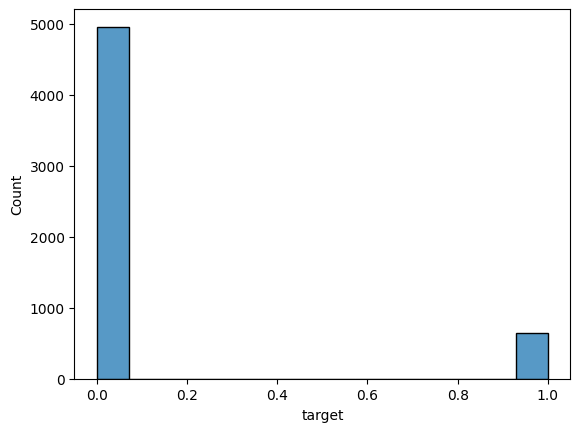

In [ ]:
sns.histplot(df['target'])

- Como podemos notar nuestra variable objetivo se encuentra desbalanceada. Esto presentará problemas a la hora de realizar nuestros modelos por lo que optaremos aplicar tecnicas de sobremuestreo como SMOTE.

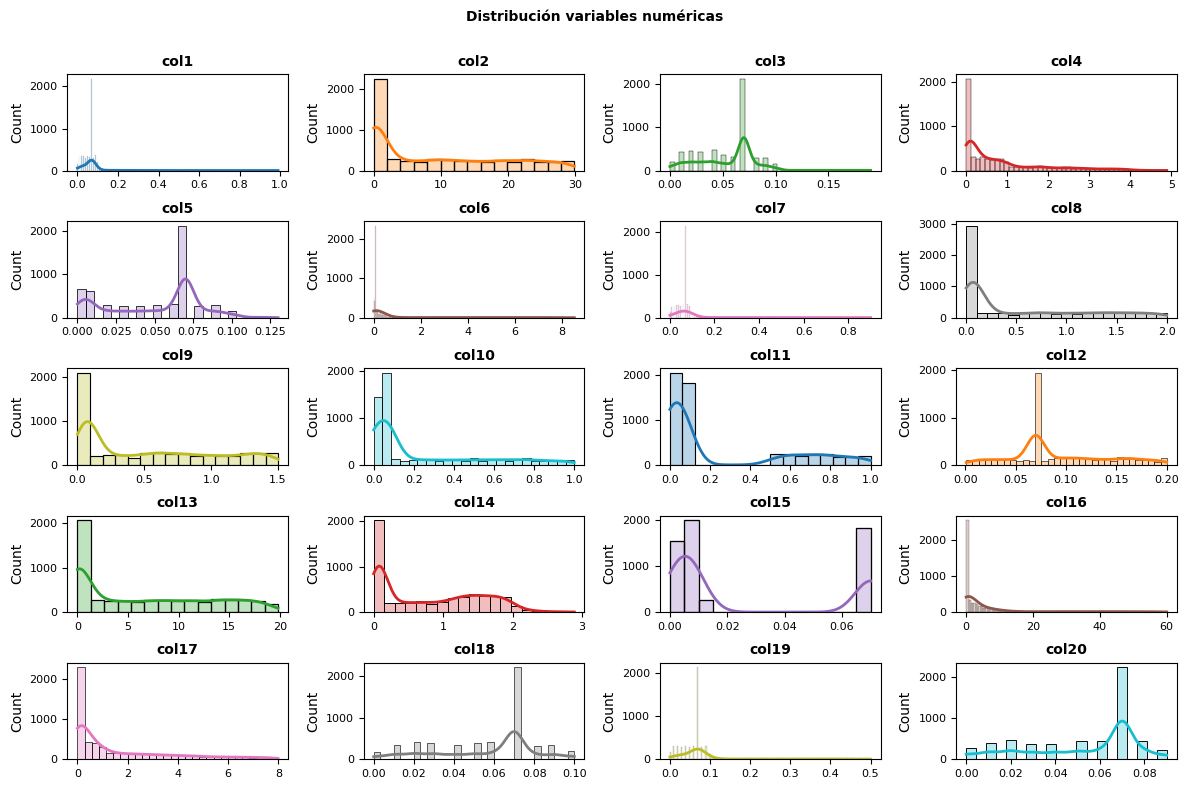

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 8))
axes = axes.flat
columnas_numeric = df.loc[:, 'col1': 'col20' ].select_dtypes(include=['float64', 'int']).columns # Almacena en columnas_numeric todas las variables númericas

for i, colum in enumerate(columnas_numeric): # Hacemos un bucle para que vaya graficando una a una
    sns.histplot(
        data    = df.loc[:, 'col1': 'col20' ], # De donde viene la información
        x       = colum, # La columna a graficar en el eje x
        stat    = "count", # El tipo estadistico
        kde     = True, # QUe nos muestre la linea de densidad
        color   = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"], # Unos colores para cada gráfico
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

<Axes: >

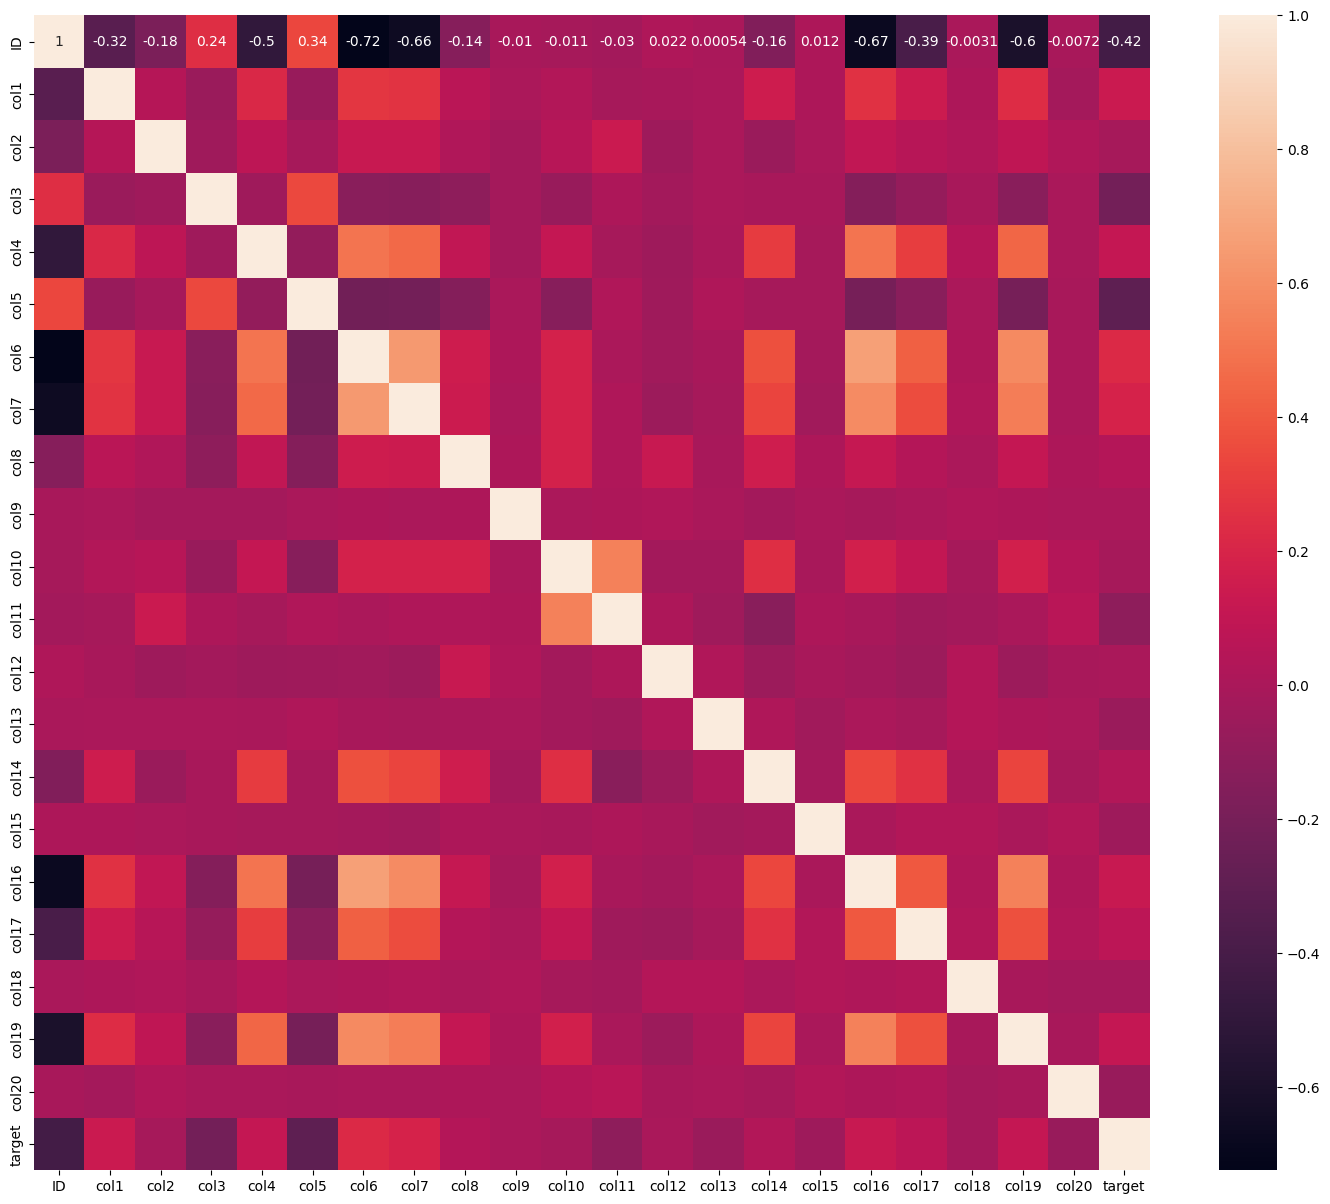

In [29]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(method='spearman'), annot=True)

In [ ]:
df.corr(method='spearman')

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
ID,1.000000,-0.289120,0.595989,-0.236396,0.503468,-0.176032,0.071630,-0.324995,0.416003,0.611640,0.128520,-0.170099,0.272905,0.683134,0.707409,-0.685402,0.479471,0.556930,-0.302448,-0.320397,-0.381583,-0.784732
col1,-0.289120,1.000000,-0.143721,0.021684,-0.063936,-0.005399,0.065627,0.194898,-0.048507,-0.142655,0.025862,0.013792,-0.057452,-0.160877,-0.105428,0.174460,-0.040054,-0.098279,0.087953,0.184390,0.056486,0.254441
col2,0.595989,-0.143721,1.000000,-0.361157,0.637751,-0.379599,0.369064,0.001401,0.424986,0.597856,0.165236,0.031630,0.240602,0.675921,0.600987,-0.672037,0.667101,0.638227,-0.287671,-0.038298,-0.371779,-0.694805
col3,-0.236396,0.021684,-0.361157,1.000000,-0.357986,0.347089,-0.274028,-0.129871,-0.297789,-0.320711,-0.141296,0.010553,-0.146310,-0.339787,-0.356318,0.333140,-0.415969,-0.370692,0.129190,-0.078243,0.179936,0.319556
col4,0.503468,-0.063936,0.637751,-0.357986,1.000000,-0.445192,0.457470,0.144934,0.433718,0.551550,0.228201,-0.042051,0.234492,0.623916,0.660903,-0.625587,0.724385,0.655045,-0.248230,0.114292,-0.344393,-0.624464
col5,-0.176032,-0.005399,-0.379599,0.347089,-0.445192,1.000000,-0.411422,-0.248040,-0.332168,-0.328191,-0.231923,0.019800,-0.156842,-0.355397,-0.416017,0.350817,-0.494553,-0.435897,0.158800,-0.196173,0.200632,0.313569
col6,0.071630,0.065627,0.369064,-0.274028,0.457470,-0.411422,1.000000,0.359249,0.297021,0.292296,0.259994,0.012841,0.130736,0.304701,0.420069,-0.322226,0.543589,0.447653,-0.122581,0.294682,-0.191593,-0.261525
col7,-0.324995,0.194898,0.001401,-0.129871,0.144934,-0.248040,0.359249,1.000000,0.098346,-0.031410,0.234988,0.074356,-0.039885,-0.056463,0.089579,0.044663,0.223967,0.111265,0.030237,0.373382,0.028329,0.108525
col8,0.416003,-0.048507,0.424986,-0.297789,0.433718,-0.332168,0.297021,0.098346,1.000000,0.383699,0.430314,0.016177,0.209193,0.409726,0.509985,-0.401196,0.456908,0.393851,-0.172348,0.057832,-0.218948,-0.431997
col9,0.611640,-0.142655,0.597856,-0.320711,0.551550,-0.328191,0.292296,-0.031410,0.383699,1.000000,0.121638,-0.036768,0.261804,0.612450,0.573296,-0.613275,0.575771,0.570780,-0.256245,-0.058737,-0.314111,-0.631167


- ID podemos eliminarla ya que no nos aportará mucho a nuestros modelos y no son de un único identificador.
- Optamos por el coeficiente de correlación de Spearman, ya que es una buena opción para modelos de clasificación debido a su capacidad para manejar relaciones no lineales, su robustez ante valores atípicos y su adecuación para datos ordinales.

In [ ]:
df.ID.nunique()

3771

In [ ]:
df.drop(columns='ID', inplace=True)

### Preprocesamiento de datos y Creación del BaseLine

In [30]:
# Definir las variables X e y
X = df.drop(columns=['target'])
y = df['target']

numeric = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8',
       'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16',
       'col17', 'col18', 'col19', 'col20']
# Definir transformadores para características numéricas y categóricas
numeric_transformer = MinMaxScaler()

# Crear un ColumnTransformer para aplicar transformaciones a diferentes columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric)
    ]
)

# Crear el pipeline con el preprocesador
pipeline = make_pipeline(preprocessor)

X_processed = pipeline.fit_transform(X)
# # Crear DataFrame con los datos procesados y los nombres de las columnas
processed_df = pd.DataFrame(X_processed, columns=numeric)

# # Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(processed_df, y, test_size=0.2, random_state=24)

# # Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=24)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


¿Qué hicimos?

- Para comenzar dividimos la variable objetivo de nuestras features para aplicarle a las mismas las sigueintes transformaciones:

--------- MinMaxScaler -> Escala nuestros datos en un rango que va desde cero a uno.

--------- Dividimos nuestras features para poder comparar luego que tan bueno es nuestro modelo. -> train_test_split

--------- Por último aplicamos el SMOTE que generará un sobremuestreo con valores 'artificales' para que nuestros modelos generalicen mejor.

<Axes: xlabel='target', ylabel='Count'>

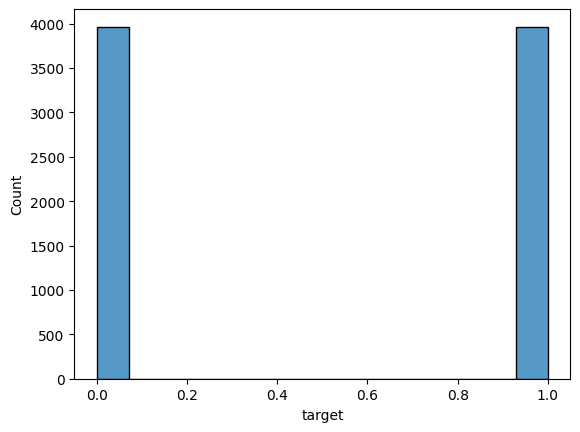

In [31]:
sns.histplot(y_train_resampled)

- Ahora sí estamos listos para comenzar a realizar nuestro BaseLine con la variable objetivo balanceada.

In [32]:
BaseLine(X_train_resampled, y_train_resampled, cv=5, metricas_cross_validate= ['accuracy', 'f1_macro', 'recall_macro', 'precision_macro']) # Realizar un baseline -> input = 1,2,7,9

,Modelo,Score
14,XGBoost_recall,0.955485
15,XGBoost_precision,0.960988
13,XGBoost_f1,0.955029
12,XGBoost_accuracy,0.955485
6,Random Forest_recall,0.955990
7,Random Forest_precision,0.957624
5,Random Forest_f1,0.955937
4,Random Forest_accuracy,0.955990
2,Logistic Regression_recall,0.778310
3,Logistic Regression_precision,0.779306


### Evaluación del modelo

Como el tiempo es un factor importante para poder realizar un correcto trabajo sobre los datos, elegiremos el mejor modelo proporcionado por el BaseLine y nos saltearemos la parte de buscar y comparar varios de estos. Esa es la etapa donde tratamos de adaptar lo mejor posible dos o tres modelos y quedarnos con el que responda de mejor manera la política de negocios. 
- A tener en cuenta que el BaseLine solo propone una media de por donde se encuentran esas métricas. 